In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
path = r"/content/drive/MyDrive/4. children anemia.csv"
dataset = pd.read_csv(path)

In [ ]:
dataset.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [ ]:
dataset.tail()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
33919,35-39,Rural,Secondary,Richer,2,19,120.0,Not anemic,Yes,No,Married,Living with her,NaN,No,120.0,Not anemic,Yes
33920,25-29,Rural,No education,Richer,1,27,120.0,Not anemic,Yes,No,Never in union,NaN,Hours: 1,No,120.0,Not anemic,No
33921,25-29,Rural,Higher,Richer,1,22,149.0,Not anemic,Yes,No,Married,Living with her,Hours: 1,No,119.0,Not anemic,No
33922,20-24,Rural,Secondary,Richer,1,21,123.0,Not anemic,Yes,No,Married,Living with her,Immediately,No,75.0,Moderate,Yes
33923,40-44,Rural,Secondary,Richest,1,35,NaN,NaN,No,No,Married,Living with her,Immediately,NaN,NaN,NaN,NaN


In [ ]:
dataset.shape

(33924, 17)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33924 entries, 0 to 33923
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   33924 non-null  object 
 1   Type of place of residence                                             33924 non-null  object 
 2   Highest educational level                                              33924 non-null  object 
 3   Wealth index combined                                                  33924 non-null  object 
 4   Births in last five years                                              33924 non-null  int64  
 5   Age of respondent at 1st birth                                         33924 non-null  int64  
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13136 non-null 

In [ ]:
dataset.describe()

,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Hemoglobin level adjusted for altitude (g/dl - 1 decimal)
count,33924.000000,33924.000000,13136.000000,10182.000000
mean,1.823783,19.570776,114.367235,101.270183
std,0.705460,4.313172,15.915408,15.569583
min,1.000000,12.000000,20.000000,29.000000
25%,1.000000,16.000000,105.000000,92.000000
50%,2.000000,19.000000,115.000000,103.000000
75%,2.000000,22.000000,125.000000,112.000000
max,6.000000,48.000000,218.000000,170.000000


In [ ]:
#data cleaning
df.isnull().sum()

Age in 5-year groups                                                     0
Type of place of residence                                               0
Highest educational level                                                0
Wealth index combined                                                    0
Births in last five years                                                0
Age of respondent at 1st birth                                           0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    0
Anemia level                                                             0
Have mosquito bed net for sleeping (from household questionnaire)        0
Smokes cigarettes                                                        0
Current marital status                                                   0
Currently residing with husband/partner                                  0
Had fever in last two weeks                                              0
Hemoglobin level adjusted

In [ ]:
dataset.drop(columns=['Anemia level.1'],inplace=True)

<ipython-input-339-17dd8fccebf9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')


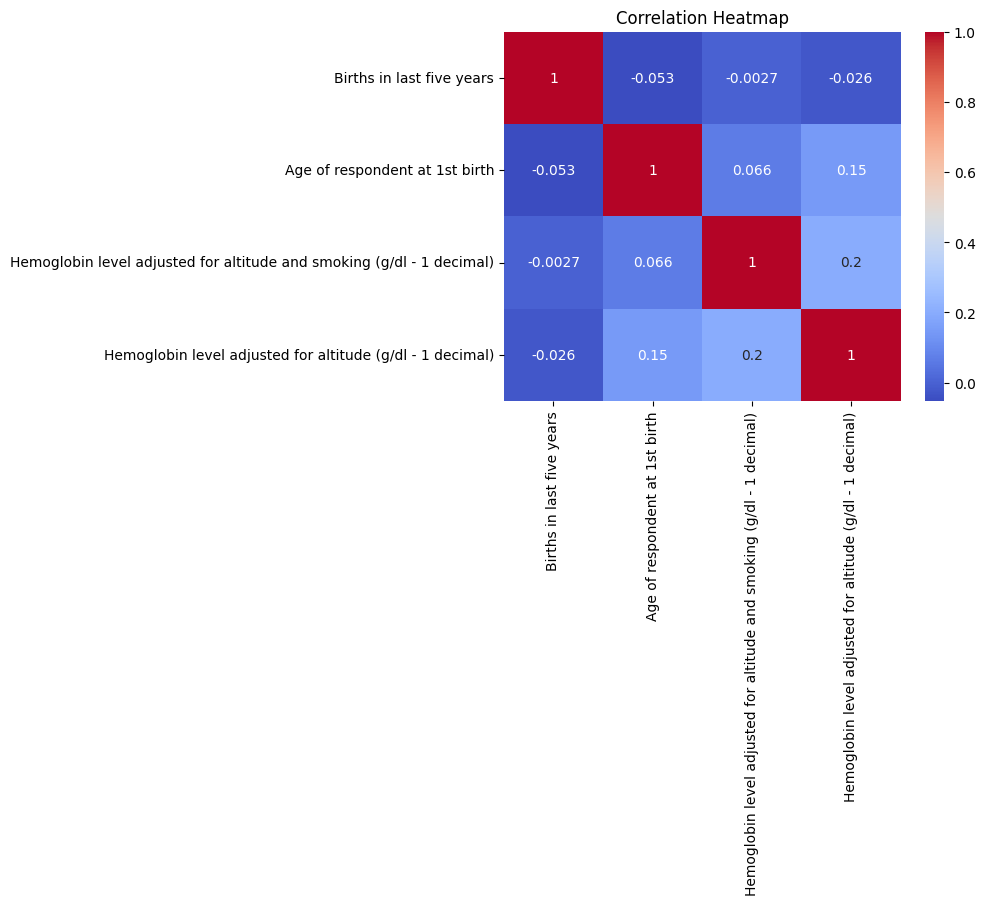

In [ ]:
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

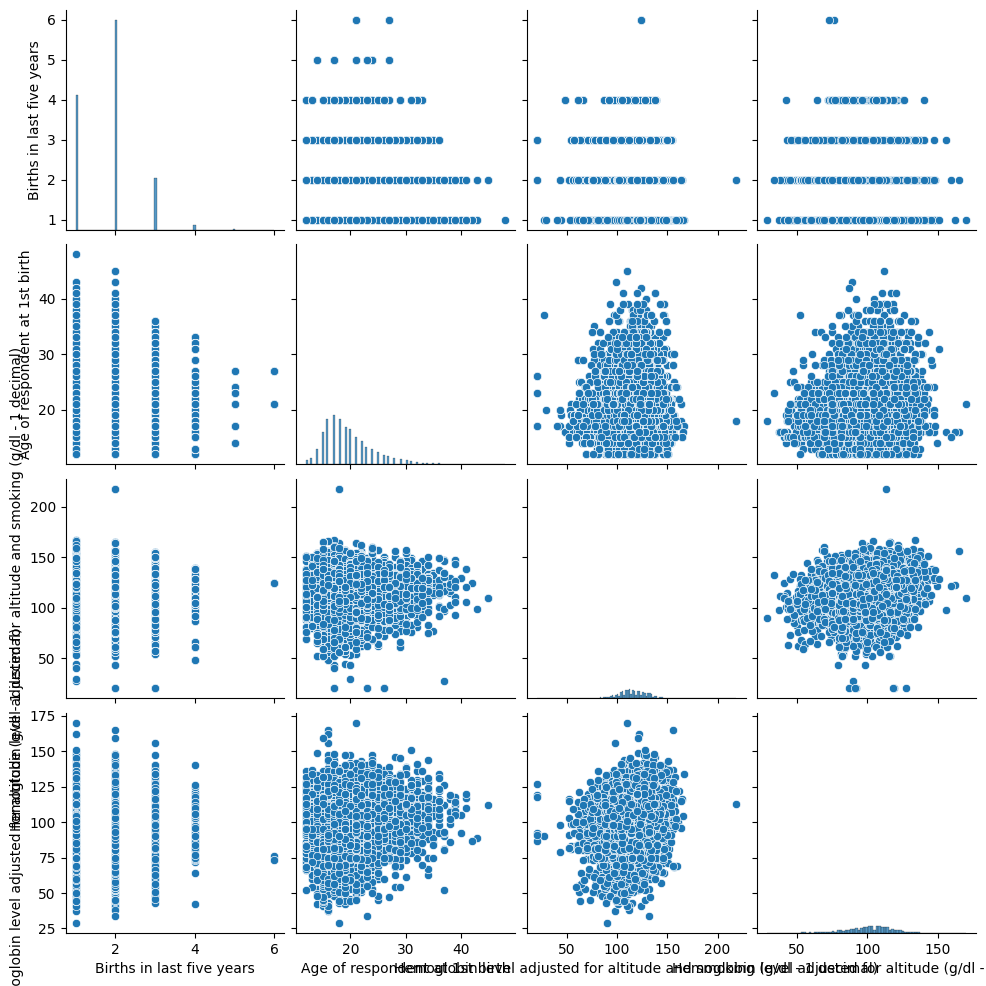

In [ ]:
sns.pairplot(dataset)
plt.show()

<Axes: >

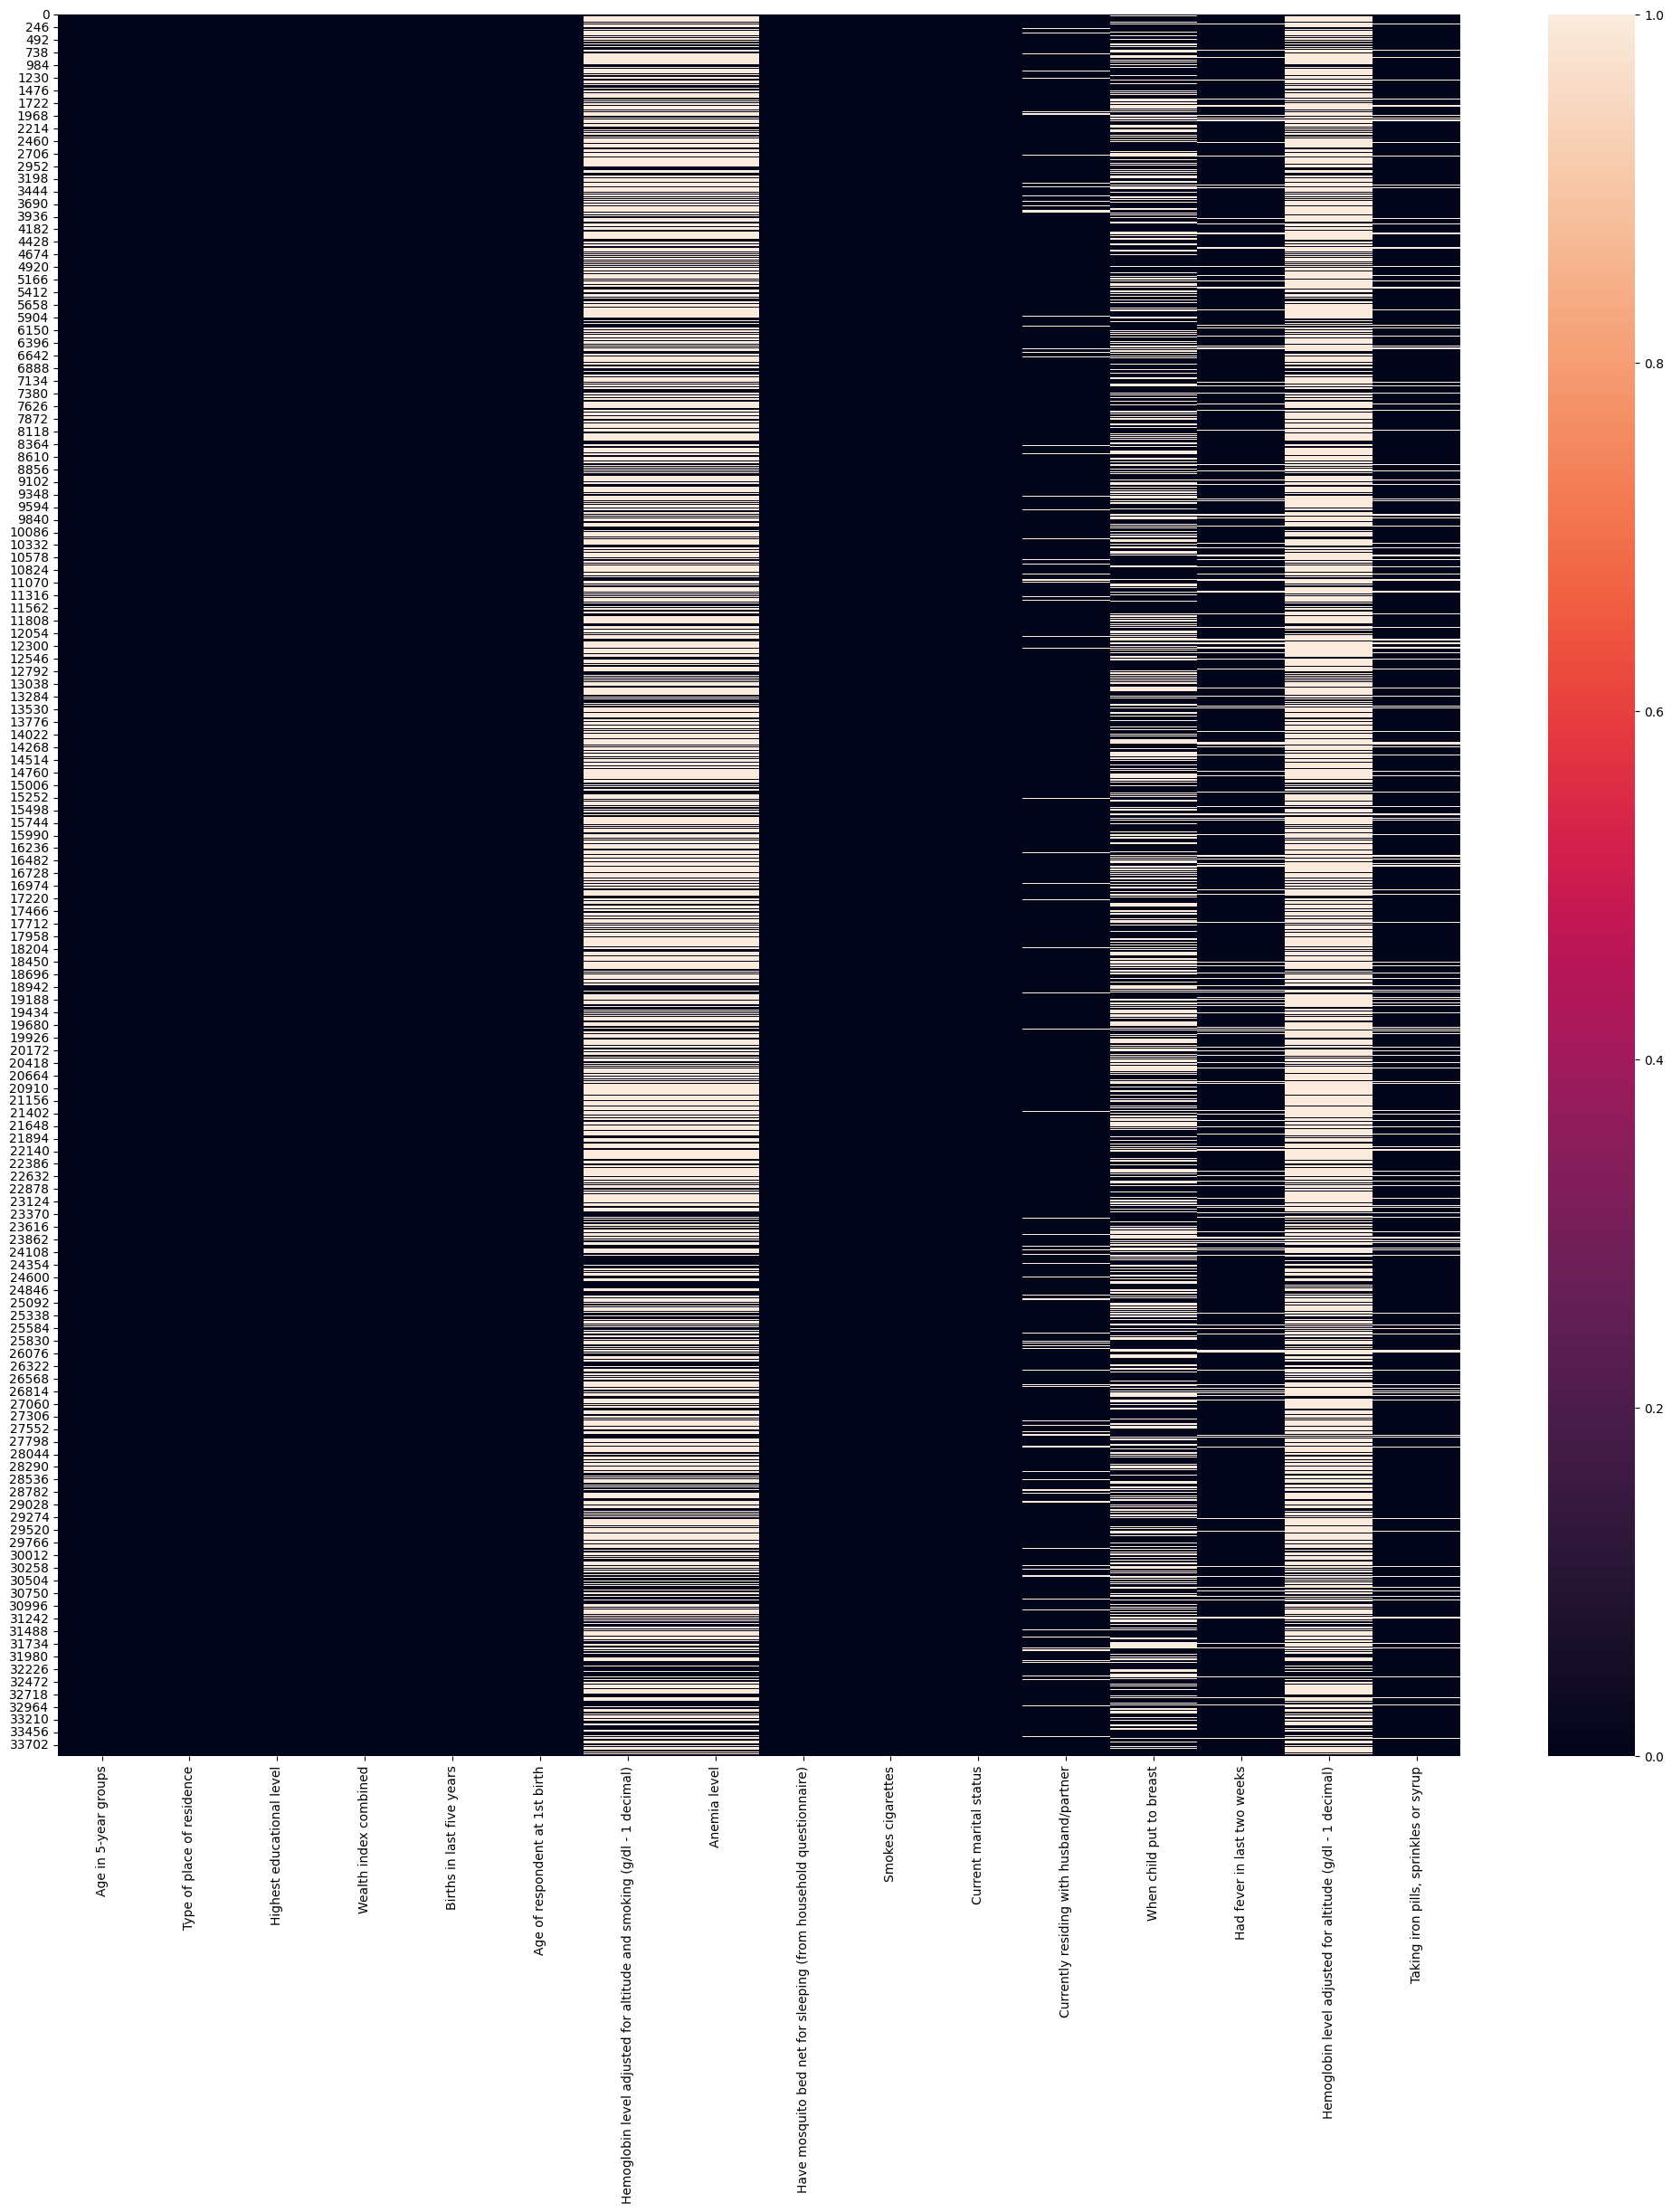

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(dataset.isnull())

In [ ]:
dataset.dropna(subset=['Anemia level','When child put to breast','Had fever in last two weeks','Taking iron pills, sprinkles or syrup'],inplace=True)
dataset['Currently residing with husband/partner']=dataset['Currently residing with husband/partner'].fillna(dataset['Currently residing with husband/partner'].median)

dataset['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)']=dataset['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].fillna(
    dataset['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].mean)
dataset['Age in 5-year groups']=dataset['Age in 5-year groups'].apply(lambda x: sum(map(int,x.split('-')))/2)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7808 entries, 3 to 33922
Data columns (total 16 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   7808 non-null   float64
 1   Type of place of residence                                             7808 non-null   object 
 2   Highest educational level                                              7808 non-null   object 
 3   Wealth index combined                                                  7808 non-null   object 
 4   Births in last five years                                              7808 non-null   int64  
 5   Age of respondent at 1st birth                                         7808 non-null   int64  
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  7808 non-null   

In [ ]:
dataset.head().reset_index(drop=True)

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),"Taking iron pills, sprinkles or syrup"
0,27.0,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,No
1,37.0,Urban,Secondary,Richest,2,32,121.0,Not anemic,Yes,No,Married,Living with her,Immediately,No,102.0,Yes
2,22.0,Urban,Secondary,Richest,1,19,108.0,Moderate,Yes,No,Married,Living with her,Immediately,No,113.0,Yes
3,27.0,Urban,Higher,Richest,1,24,116.0,Mild,Yes,No,Married,Living with her,Days: 1,No,109.0,No
4,22.0,Urban,Higher,Richest,2,19,118.0,Mild,Yes,No,Married,Living with her,Immediately,No,96.0,Yes


In [ ]:
dataset.drop(columns='When child put to breast',inplace=True)

df = dataset[dataset['Currently residing with husband/partner'].isin(['Living with her', 'Staying elsewhere'])]

df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'] = df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].astype(str)


encoder=LabelEncoder()

catcolumns=df.select_dtypes(include=['object']).columns.tolist()
intcol=df.select_dtypes(include=['int64','float64']).columns.tolist()

for i in catcolumns:
    df[i]=encoder.fit_transform(df[i])


<ipython-input-344-dd55f1c6deef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'] = df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].astype(str)
<ipython-input-344-dd55f1c6deef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=encoder.fit_transform(df[i])
<ipython-input-344-dd55f1c6deef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

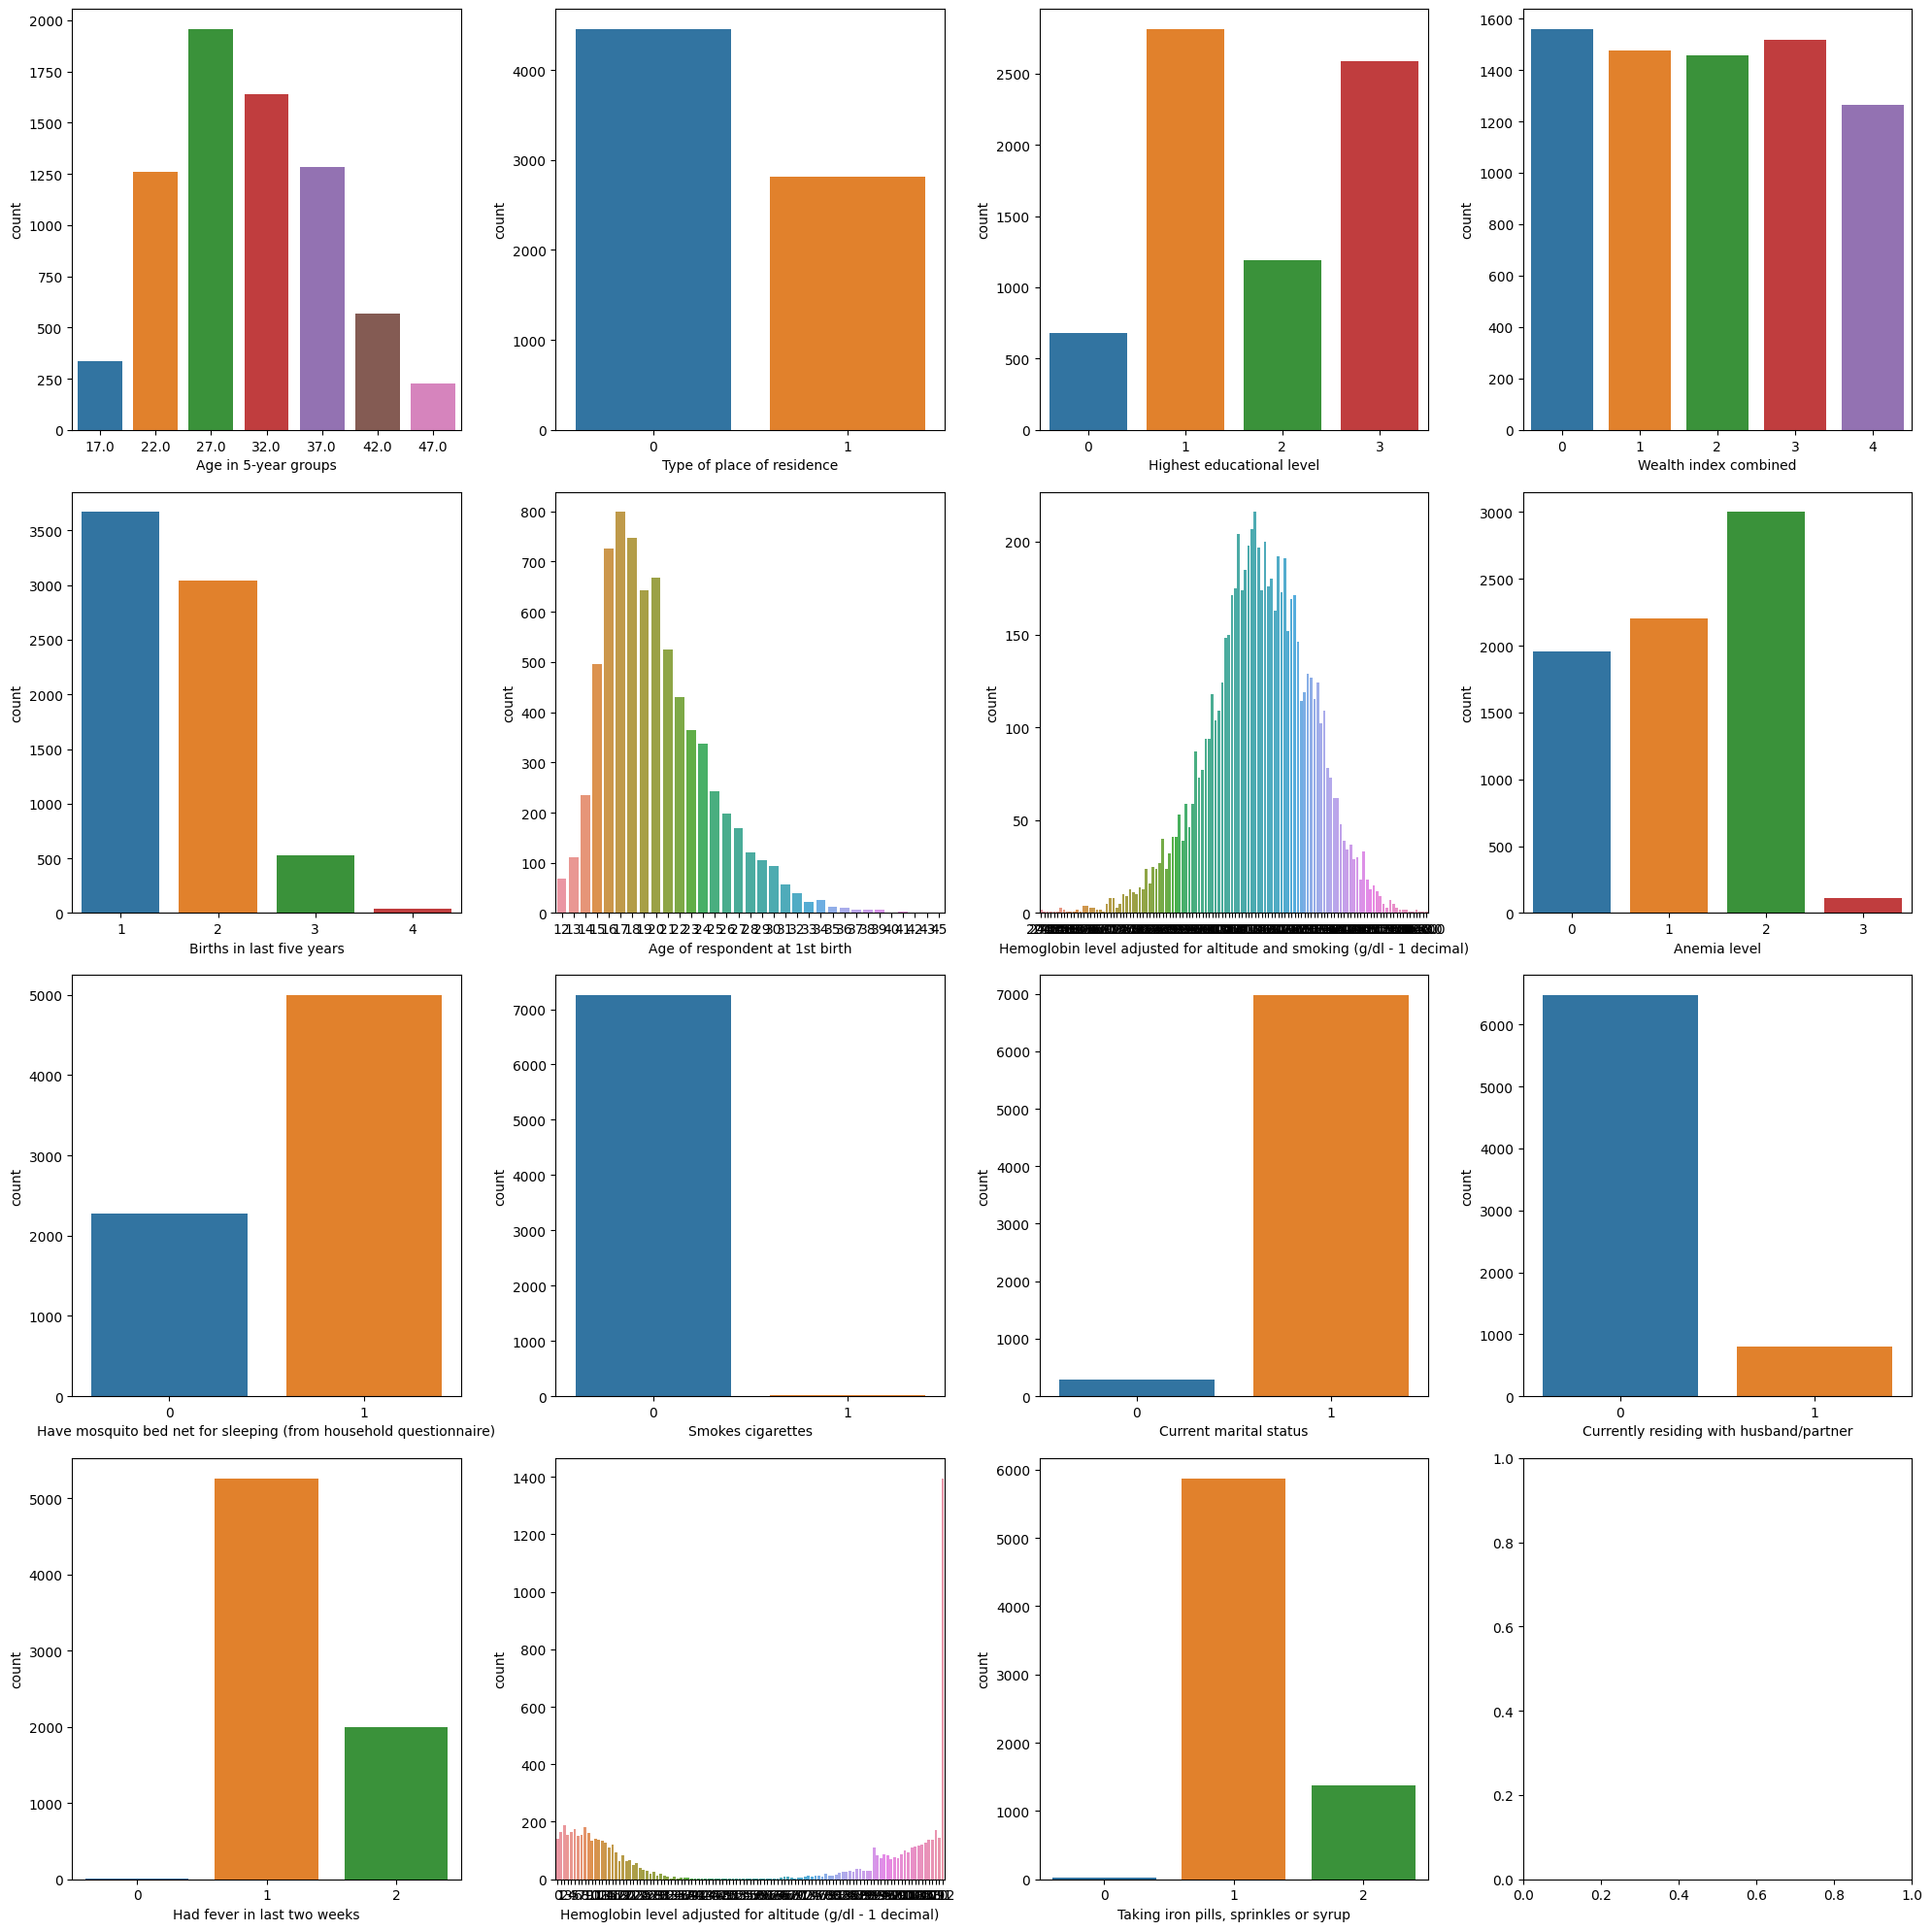

In [ ]:
count=0
fig, ax=plt.subplots(4,4,figsize=(20,20))
ax=ax.flatten()
for i in df.columns:
    sns.countplot(df,x=i,ax=ax[count])
    count+=1
plt.tight_layout()

<Axes: >

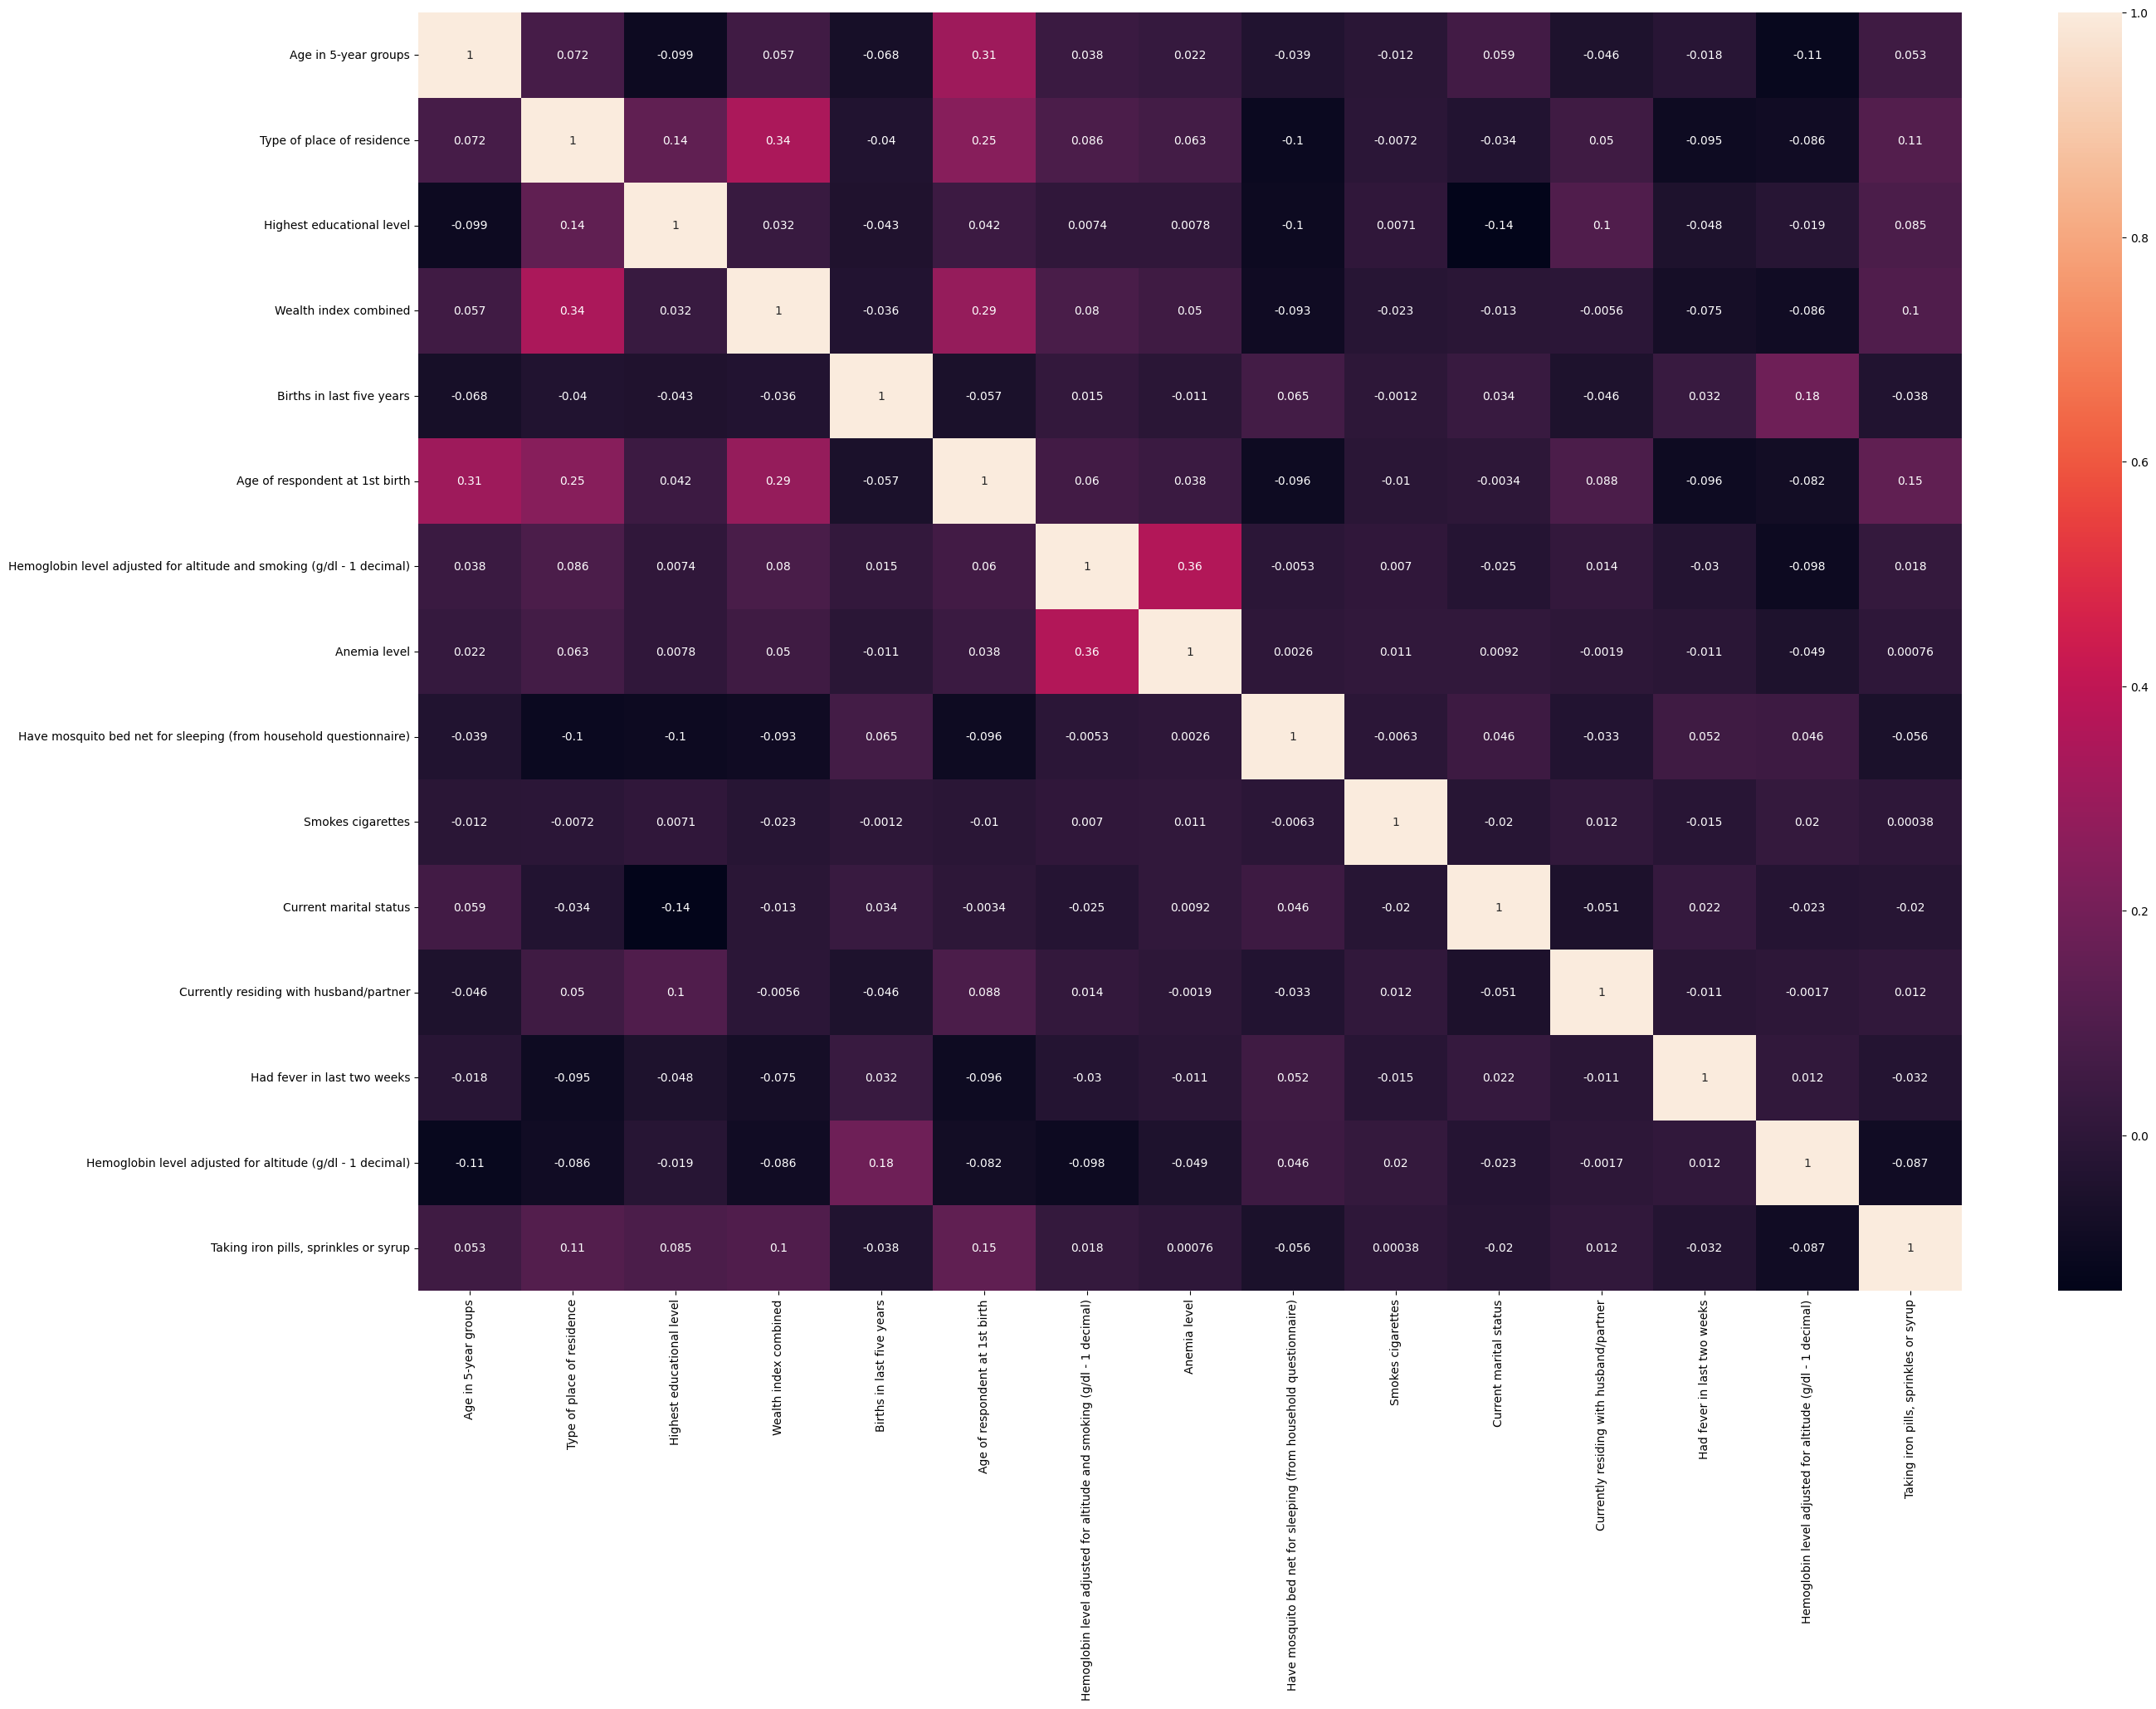

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

Decision Tree

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
scaler=StandardScaler()

In [ ]:
X=df.drop(columns=['Anemia level'])
y=df['Anemia level']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
x_train[intcol]=scaler.fit_transform(x_train[intcol])
x_test[intcol]=scaler.transform(x_test[intcol])

In [ ]:
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [ ]:
print(f1_score(y_test,prediction,average='micro'))

0.8863428047662695


Random Forest

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier()
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=2)

In [ ]:
transform =  ColumnTransformer([("norm1",OneHotEncoder(),[0])], remainder = 'passthrough')
x = transform.fit_transform(x)
x

array([[ 1.,  0.,  1., ...,  0.,  1., 14.],
       [ 1.,  0.,  1., ...,  0.,  1.,  2.],
       [ 1.,  0.,  1., ...,  0.,  1., 13.],
       ...,
       [ 1.,  0.,  1., ...,  0.,  1.,  8.],
       [ 1.,  0.,  1., ...,  0.,  1., 19.],
       [ 1.,  0.,  1., ...,  0.,  1., 87.]])

In [ ]:
y_pred_proba = cross_val_predict(model, x_train, y_train, cv=3, n_jobs=-1, method='predict_proba')[:, 1]

In [ ]:
threshold = 0.5
y_pred = y_pred_proba >= threshold
correct = y_pred == y_train

labels = pd.DataFrame({'Ground Truth': y_train,
                       'Predicted Probability': y_pred_proba,
                       'Discrete Prediction': y_pred,
                       'Correct Prediction?': correct})

labels.head(20)

,Ground Truth,Predicted Probability,Discrete Prediction,Correct Prediction?
16278,2,0.0,False,False
3415,1,1.0,True,True
10349,3,0.0,False,False
19240,2,0.0,False,False
23518,2,0.0,False,False
5430,2,0.0,False,False
25564,2,0.0,False,False
6972,2,0.0,False,False
31412,0,0.0,False,True
30817,2,0.0,False,False


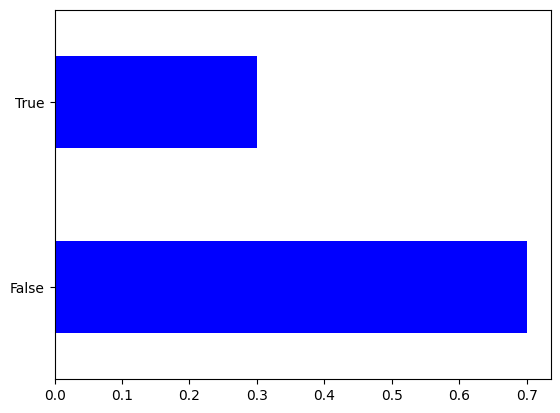

In [ ]:
labels['Discrete Prediction'].value_counts(normalize=True).plot.barh(color='blue');

<ipython-input-359-5699fb14eba2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(labels['Predicted Probability']);


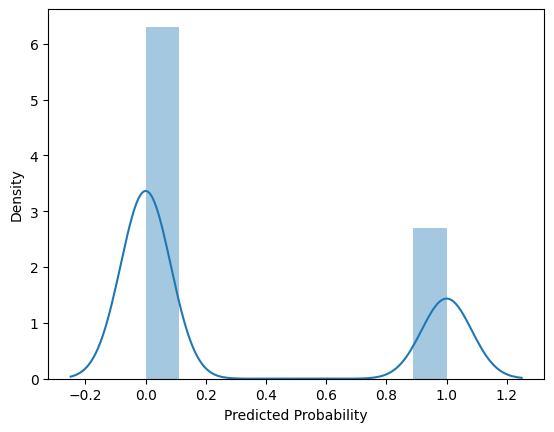

In [ ]:
sns.distplot(labels['Predicted Probability']);

In [ ]:
X = df.drop('Anemia level', axis=1)
y = df['Anemia level']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=4)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
accuracy_scores = cross_val_score(rf_classifier, X, y, cv=cv, scoring='accuracy')

In [ ]:
print(f'Accuracy Scores: {accuracy_scores}')

Accuracy Scores: [0.9257732  0.91958763 0.92027491 0.90784044 0.92916094]


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,prediction)

array([[164, 180, 231,   8],
       [167, 202, 285,   7],
       [240, 268, 392,   8],
       [  8,  12,  10,   0]])

In [ ]:
from sklearn.utils.multiclass import unique_labels

In [ ]:
unique_labels(y_test)

array([0, 1, 2, 3])

In [ ]:
y_true = [1, 0, 1, 2, 1, 0, 1, 2, 2, 0]
y_pred = [1, 0, 1, 2, 1, 0, 1, 1, 2, 0]

In [ ]:
cm = confusion_matrix(y_true, y_pred)

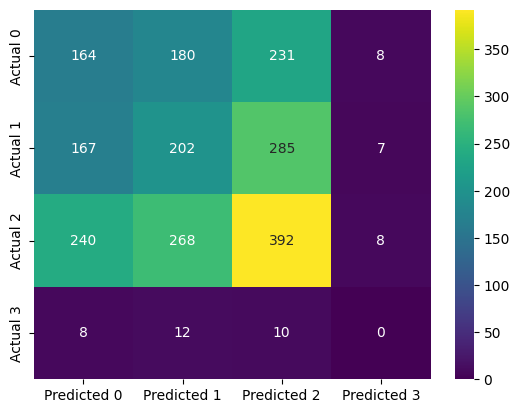

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_test,prediction);

Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       583
           1       0.88      0.99      0.93       661
           2       1.00      0.92      0.96       908
           3       0.90      0.30      0.45        30

    accuracy                           0.92      2182
   macro avg       0.91      0.77      0.80      2182
weighted avg       0.92      0.92      0.92      2182

